# Part 2: Feature Engineering

This workbook is 2 out of 3 parts of a prediction model to determine the occurrence of West Nile Virus (WNV). The focus of this part is to perform feature engineering on the combined dataset for train and weather that will be fed to the model.

It was noted that higher temperature and lower precipitation has a general trend with prescence of WNV. Outside of these indicators, other features is not that conclusive.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_weather_df = pd.read_csv('../datasets/train_weather.csv')

In [4]:
train_weather_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,bcfg,br,dz,fg,fu,gr,hz,mifg,ra,sn,sq,ts,tsra,vcfg,vcts
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,1.5,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,1.5,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007,1.5,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007,1.5,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007,1.5,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation Heatmap of Weather Dataset Features to WnvPresent


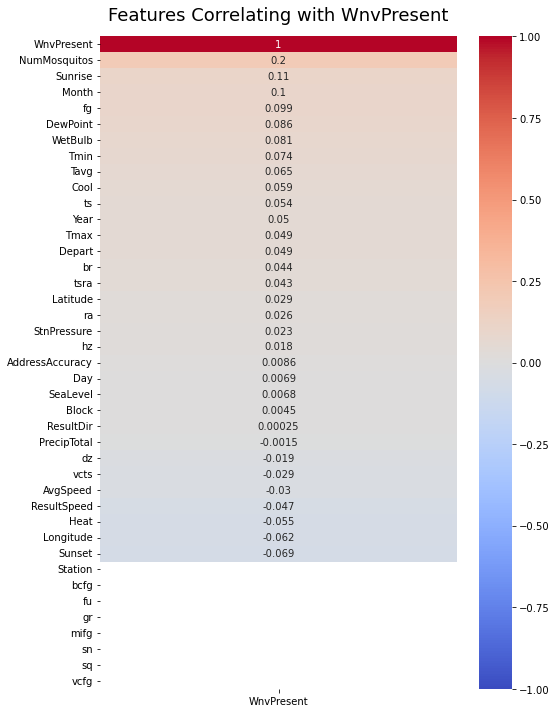

In [5]:
# Plot heatmap correlating to WnvPresent
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_weather_df.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with WnvPresent', fontdict={'fontsize':18}, pad=16);

In [6]:
train_weather_df.drop(['Station', 
                       'bcfg',
                       'fu',
                       'gr',
                       'mifg',
                       'sn',
                       'sq',
                       'vcfg'
                      ],axis=1, inplace=True)

In [7]:
train_weather_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Correlation Heatmap of Species to WnvPresent

In [8]:
train_species = train_weather_df.loc[:, ['Species', 'NumMosquitos', 'WnvPresent']]
train_species = pd.get_dummies(train_species, drop_first=True)

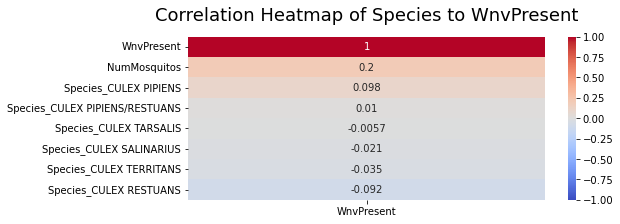

In [9]:
# Plot heatmap correlating Species to WnvPresent
plt.figure(figsize=(8, 3))
heatmap = sns.heatmap(train_species.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap of Species to WnvPresent', fontdict={'fontsize':18}, pad=16);

From the correlation of certain subspecies of Culex to WnvPresent, we see that `CULEX PIPIENS` and `CULEX RESTUANS` have higher correlations as compared to the others, as explored in our EDA previously. Hence, we will be dropping other subspecies in our modelling. Note: `CULEX PIPIENS/RESTUANS` will be kept despite its low correlation since it has significant number of observations in our dataset.

## Correlation Heatmap of Address to WnvPresent

In [10]:
train_address = train_weather_df.loc[:, ['Address', 'NumMosquitos', 'WnvPresent']]
train_address = pd.get_dummies(train_address, drop_first=True)

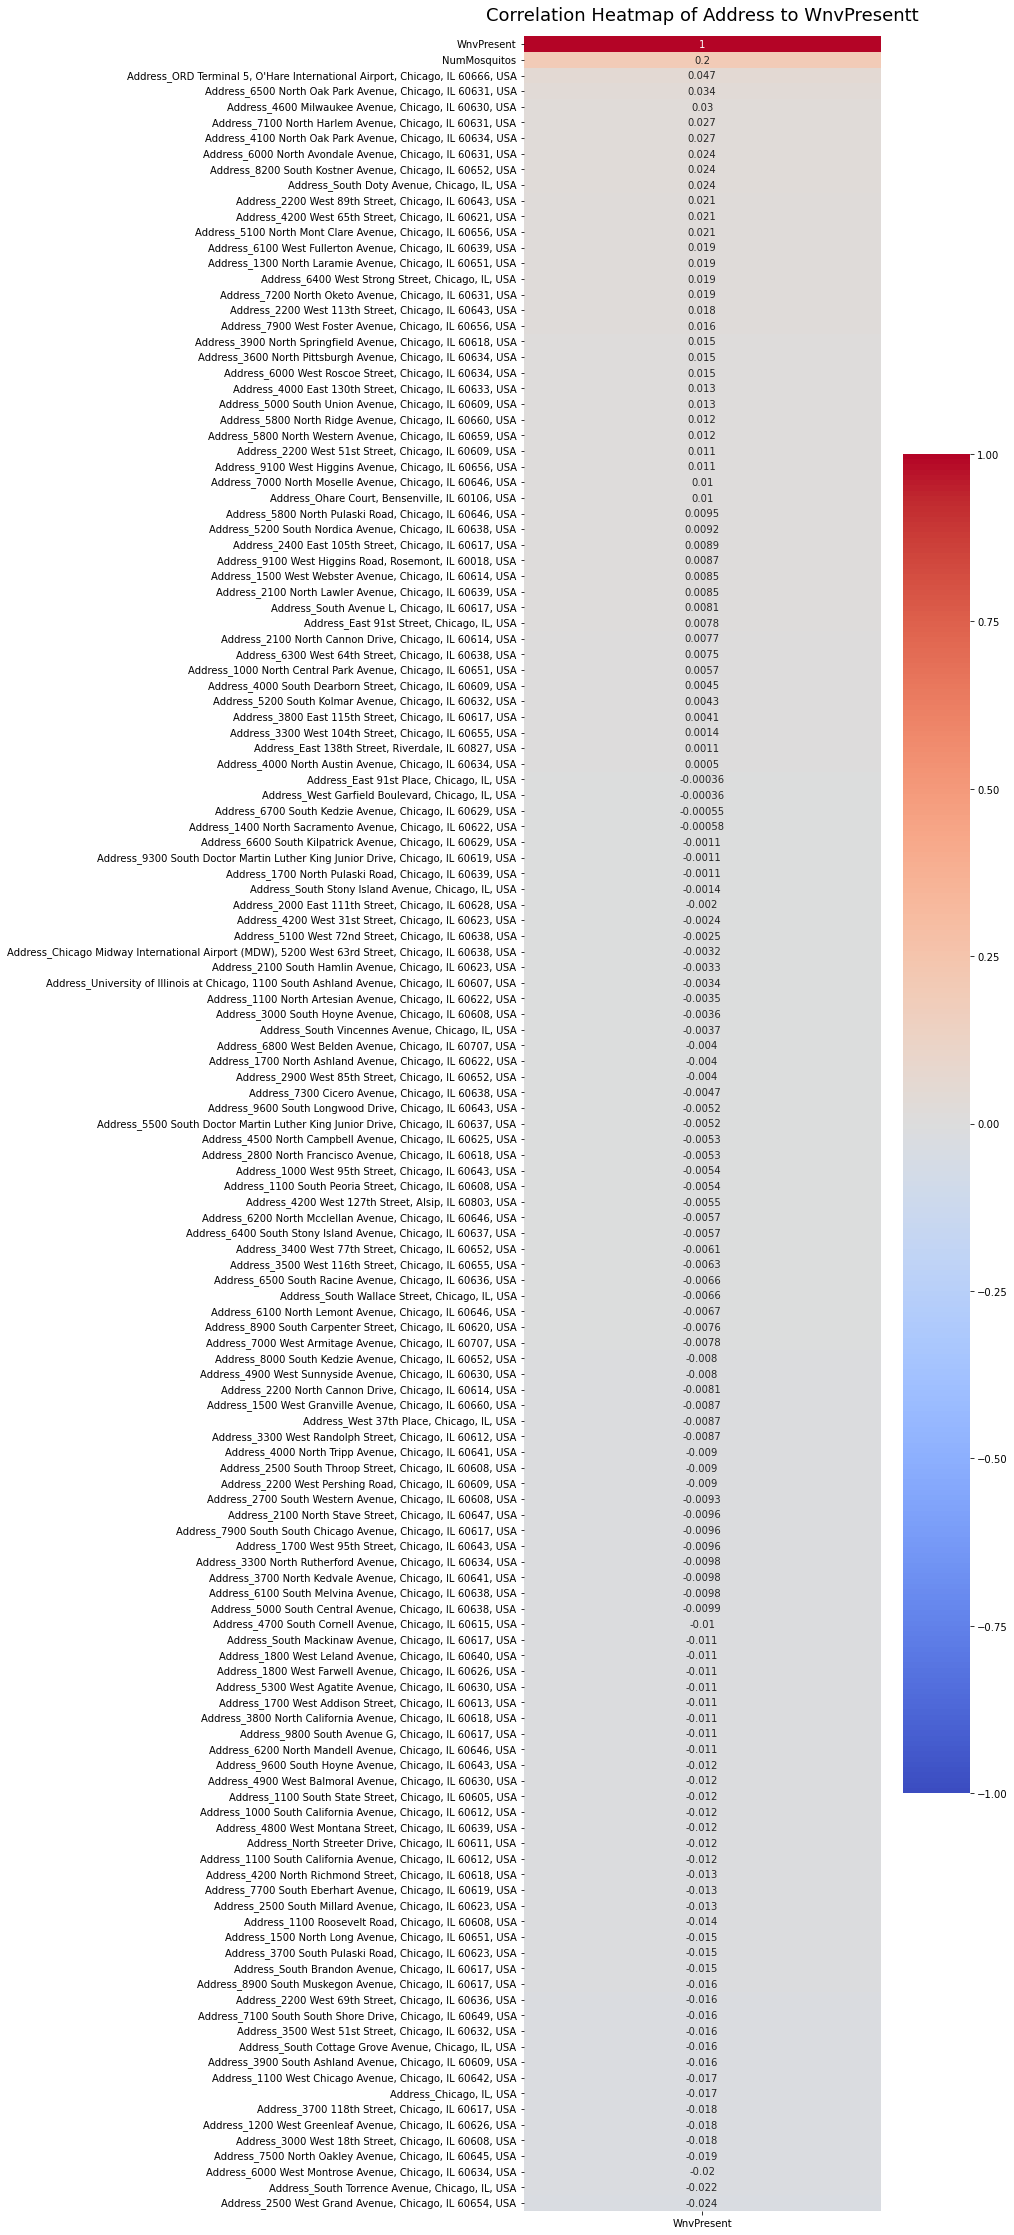

In [11]:
# Plot heatmap of Address correlating to WnvPresent
plt.figure(figsize=(8, 40))
heatmap = sns.heatmap(train_address.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap of Address to WnvPresentt', fontdict={'fontsize':18}, pad=16);

There are many unique addresses present in our dataset. Based on the plot of trap locations, there are certain trap locations that are in close proximity to each other. For this project we explore clustering of trap locations instead of simply using addresses.


## Clustering of Trap Location by Geographical Proximity

### Clustering Trap Locations by Longitude/Latitude Grid

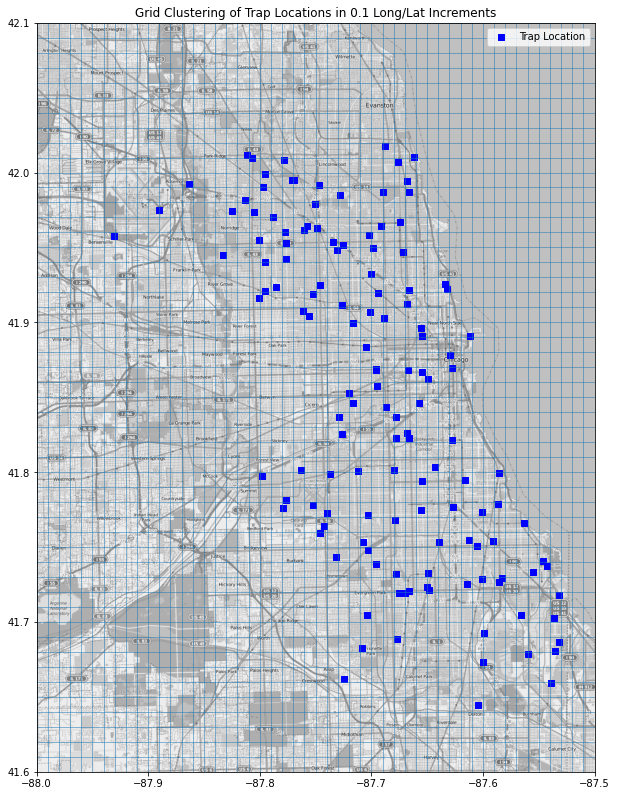

In [12]:
#Grid clustering of trap locations in 0.1 Long/Lat increments
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = train_weather_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')
plt.legend()

for num in np.linspace(41.6, 42.1, 51):
    plt.axhline(num, lw = 0.5)

for num in np.linspace(-87.5, -88, 51):
    plt.axvline(num, lw = 0.5)

plt.title('Grid Clustering of Trap Locations in 0.1 Long/Lat Increments');

We can try to conglomerate points through applying a grid and classifying points within the same square as the same cluster. Note that 0.1 Long/Lat translates to 11.1km in distance and that is more than the empirical range for an adult Culex mosquito (3.2km).[*source*](https://www.cdc.gov/mosquitoes/about/life-cycles/culex.html) 

We can try to reduce the increments to match the empirical range. However, an issue with this method is that there is an increase risk that certain points which are actually closer than 3.2km but fall on either side of an edge between two squares. This would mean that geographical neighbours can be classified under two different clusters in the above method. Hence, a better clustering technique has to be employed to effectively cluster these trap locations.


### Clustering Trap Locations using Hierarchical Clustering

In [13]:
#extract the long/lat data w address
address_locations = train_weather_df.loc[:,['Address','Longitude', 'Latitude']]
address_locations.drop_duplicates(inplace=True)
address_locations.set_index('Address', drop=True, inplace=True)
address_locations

,Longitude,Latitude
Address,,
"4100 North Oak Park Avenue, Chicago, IL 60634, USA",-87.800991,41.954690
"6200 North Mandell Avenue, Chicago, IL 60646, USA",-87.769279,41.994991
"7900 West Foster Avenue, Chicago, IL 60656, USA",-87.824812,41.974089
"1500 West Webster Avenue, Chicago, IL 60614, USA",-87.666455,41.921600
"2500 West Grand Avenue, Chicago, IL 60654, USA",-87.654491,41.891118
...,...,...
"6200 North Mcclellan Avenue, Chicago, IL 60646, USA",-87.770899,41.994679
"2900 West 85th Street, Chicago, IL 60652, USA",-87.695443,41.738903
"3400 West 77th Street, Chicago, IL 60652, USA",-87.707394,41.753391


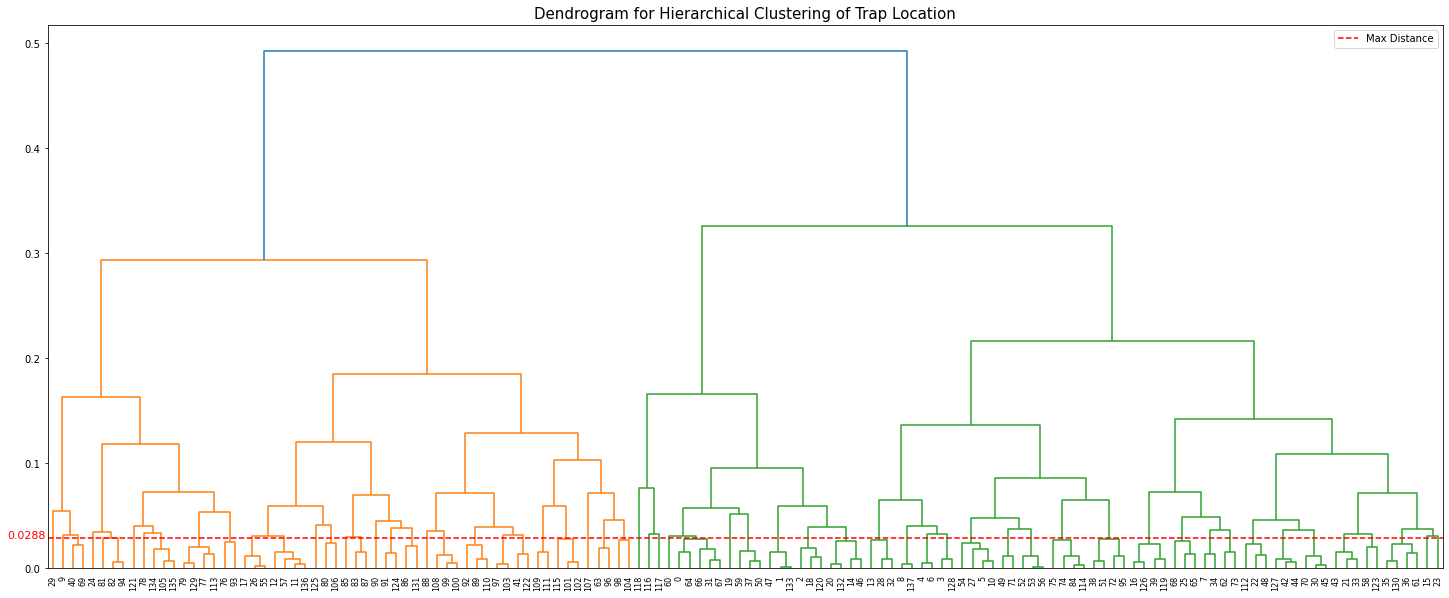

In [14]:
# Perform hierarchical clustering. 
# Z linkage matrix
Z = linkage(address_locations, method='complete', metric='euclidean')

# We will plot a dendrogram here
plt.figure(figsize=(25,10))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

max_dist = 0.02882882882882883 # pairwise distance between two points. Represents the Long/Lat degree conversion from 3.2km (known max range of Culex mosquitoes)

#Plotting Dendrogram
plt.axhline(max_dist, color = 'red', linestyle = "--", label = 'Max Distance');
plt.legend();
plt.title('Dendrogram for Hierarchical Clustering of Trap Location', size = 15);
plt.text(x = -40,y=0.0288, s=0.0288, color = 'red', size = 11);

We set the max distance (cutoff threshold) beyond which points cannot be clustered as 0.0288 degrees, which represents the Longitude/Latitude conversion of 3.2km (previously explained as the empirical maximum range for Culex mosquitoes.

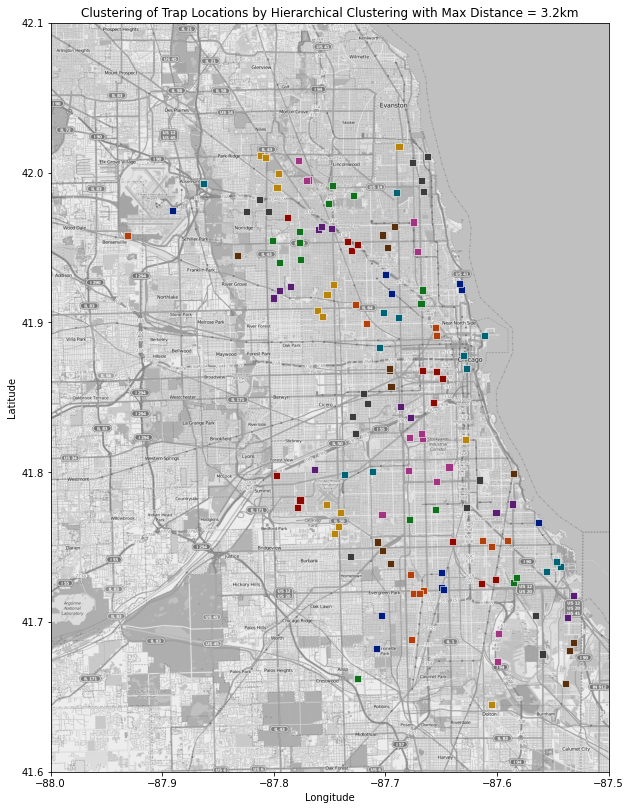

In [15]:
#adding cluster labels onto the address_locations dataframe
address_locations['cluster'] = fcluster(Z, max_dist, criterion='distance')

#Plotting clustered trap locations onto the map
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

sns.scatterplot(
    x = address_locations['Longitude'],
    y = address_locations['Latitude'],
    data = address_locations,
    palette = "dark",
    hue = 'cluster',
    marker='s',
    legend = False,
    s = 50,
);

plt.title('Clustering of Trap Locations by Hierarchical Clustering with Max Distance = 3.2km');

From the above plot, we see that geographical neighbours (denoted by neighbouring squares of the same colour) have been clustered together. 

## Correlation Heatmap of Clusters to WnvPresent

In [16]:
# Adding cluster information to main dataset
address_locations["Address"] = address_locations.index
train_weather_df['cluster'] = train_weather_df['Address'].map(lambda x: address_locations[address_locations['Address'] == str(x)]['cluster'].values[0])

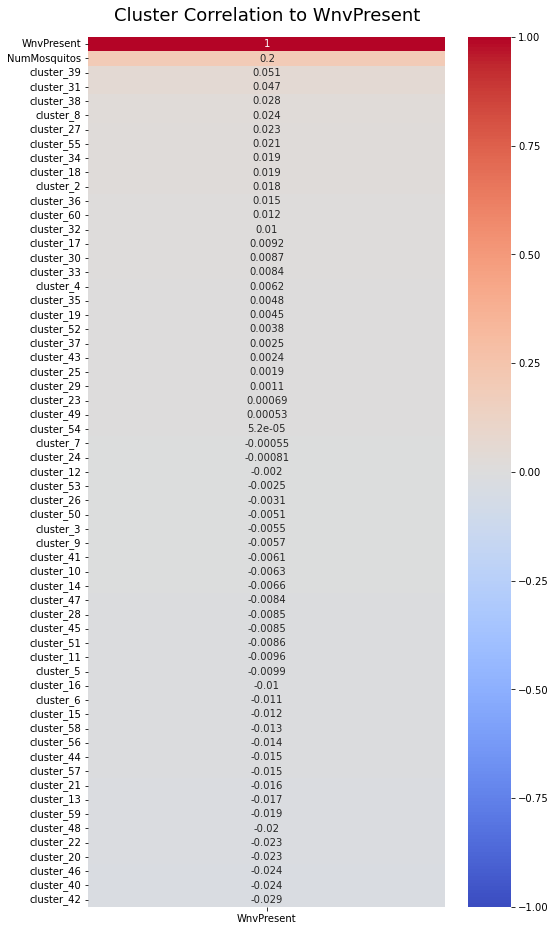

In [17]:
train_cluster = train_weather_df.loc[:, ['cluster', 'NumMosquitos', 'WnvPresent']]
train_cluster = pd.get_dummies(train_cluster, columns=['cluster'], drop_first=True)

# Plot heatmap of Cluster correlating to WnvPresent
plt.figure(figsize=(8, 16))
heatmap = sns.heatmap(train_cluster.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Cluster Correlation to WnvPresent', fontdict={'fontsize':18}, pad=16);

Overall, we see that the correlation of location has improved over the addresses. For example, `cluster_39` consisting of:

- `7200 North Oketo Avenue, Chicago, IL 60631, USA`,
- `7100 North Harlem Avenue, Chicago, IL 60631, USA`,
- `6500 North Oak Park Avenue, Chicago, IL 60631, USA`, and
- `6000 North Avondale Avenue, Chicago, IL 60631, USA` 

has a increased correlation score of 0.051. Previously, these only had a correlation score of 0.019, 0.027, 0.034, and 0.24 respectively. Thus, we believe this will help in improving model accuracy.

## Exporting Model Dataset

Dummify the `'Species'` and `'cluster'` columns. Drop the columns `'Address'`, `'Block'`, `'Street'`, `'Latitude'`, `'Longitude'`, `'AddressNumberAndStreet'`, `'Species_CULEX SALINARIUS'`,`'Species_CULEX TARSALIS'`, `'Species_CULEX TERRITANS'`, `'NumMosquitos'`, `'Trap'`.

In [18]:
train_weather_df = pd.get_dummies(train_weather_df, columns=['Species'], drop_first=True)
train_weather_df = pd.get_dummies(train_weather_df, columns=['cluster'], drop_first=True)

train_weather_df.drop(['Address', 'Block','Street','Latitude','Longitude',
                       'AddressNumberAndStreet','Species_CULEX SALINARIUS','Species_CULEX TARSALIS',
                      'Species_CULEX TERRITANS','NumMosquitos','Trap'],axis=1,inplace=True)

train_weather_df['Date']=pd.to_datetime(train_weather_df['Date'])




In [19]:
train_weather_df.to_csv('../datasets/train_weather_model.csv', index=False)